## Prepare python environment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

In [ ]:
# if running on colab, mount drive to load data, you will be prompted to authorization
try:
  import google.colab
  google.colab.drive.mount('/content/drive')
  IN_COLAB = True

  proj_path = '/content/drive/My Drive/Colab Notebooks' # TODO
  # navigate to the directory containing the project (data and notebook)
  import os
  os.chdir(proj_path)
except:
  IN_COLAB = False

Mounted at /content/drive


## Preparing the Glass Dataset (2 points)

---


We will use glass dataset from UCI machine learning repository. Details for this data can be found [here](https://archive.ics.uci.edu/ml/datasets/glass+identification). The objective of the dataset is to identify the class of glass based on the following features:

1.  RI: refractive index
2.  Na: Sodium
3.  Mg: Magnesium
4.  Al: Aluminum
5.  Si: Silica
6.  K: Potassium
7.  Ca: Calcium
8.  Ba: Barium
9.  Fe: Iron
10. Type of glass (Target label)

The classes of glass are:

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. containers
6. tableware
7. headlamps

Identification of glass from its content can be used for forensic analysis.

### Loading the dataset

In [ ]:
# Download and load the dataset
import os
if not os.path.exists('glass.csv'):
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364_2022/master/dataset/glass.csv
data = pd.read_csv('glass.csv')
# Display the first five instances in the dataset
data.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Check the data type for each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Look at some statistics of the data using the `describe` function in pandas.

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


1. Count tells us the number of Non-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each feature.

6. Max tells us the maximum value of that feature.

### Visualize the Data

#### Check how many classes of each type of glass are there in the data. This has been done for you.

Text(0.5, 1.0, 'Count of Glass Types')

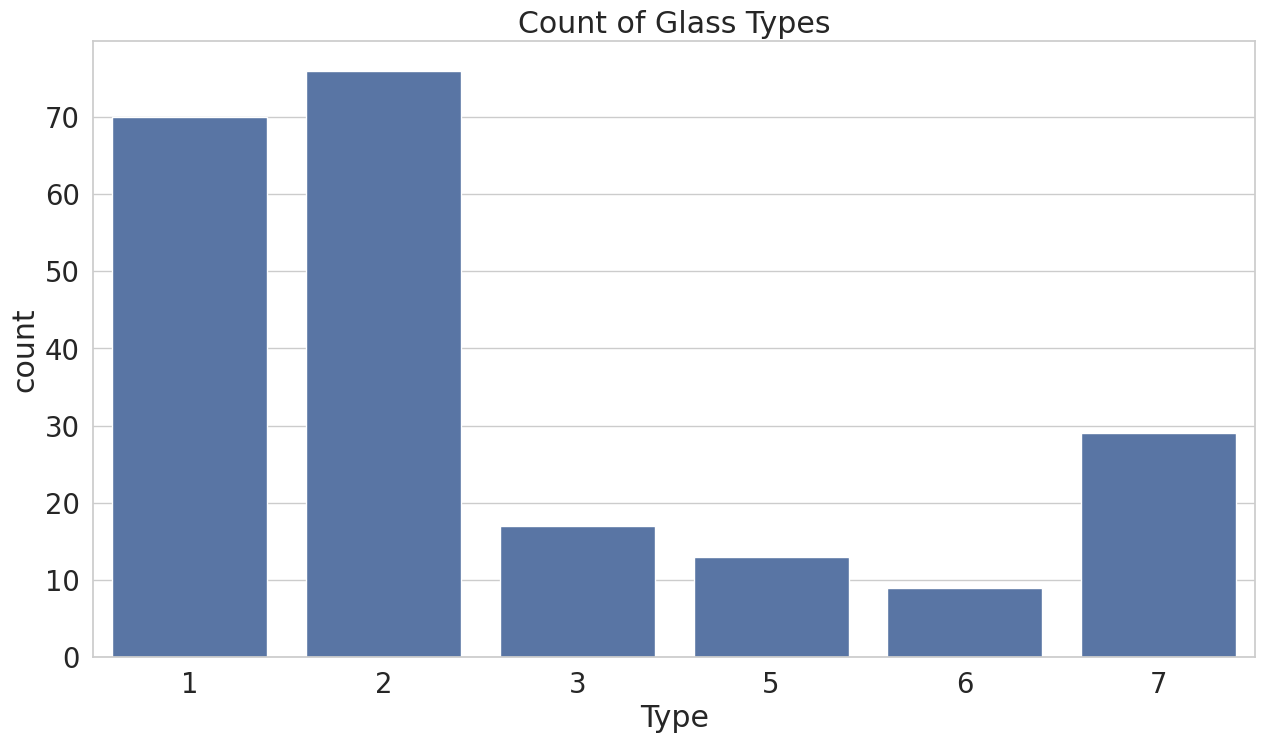

In [ ]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x='Type',data=data).set_title('Count of Glass Types')

#### Calculate `mean` material content for each kind of glass. This has been done for you.

In [ ]:
# Compute mean material content for each kind of glass
data.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


#### Create box plot to see distribution of each content in the glass. See [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for further details. This has been done for you.

<ipython-input-9-84dacbf5b331>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


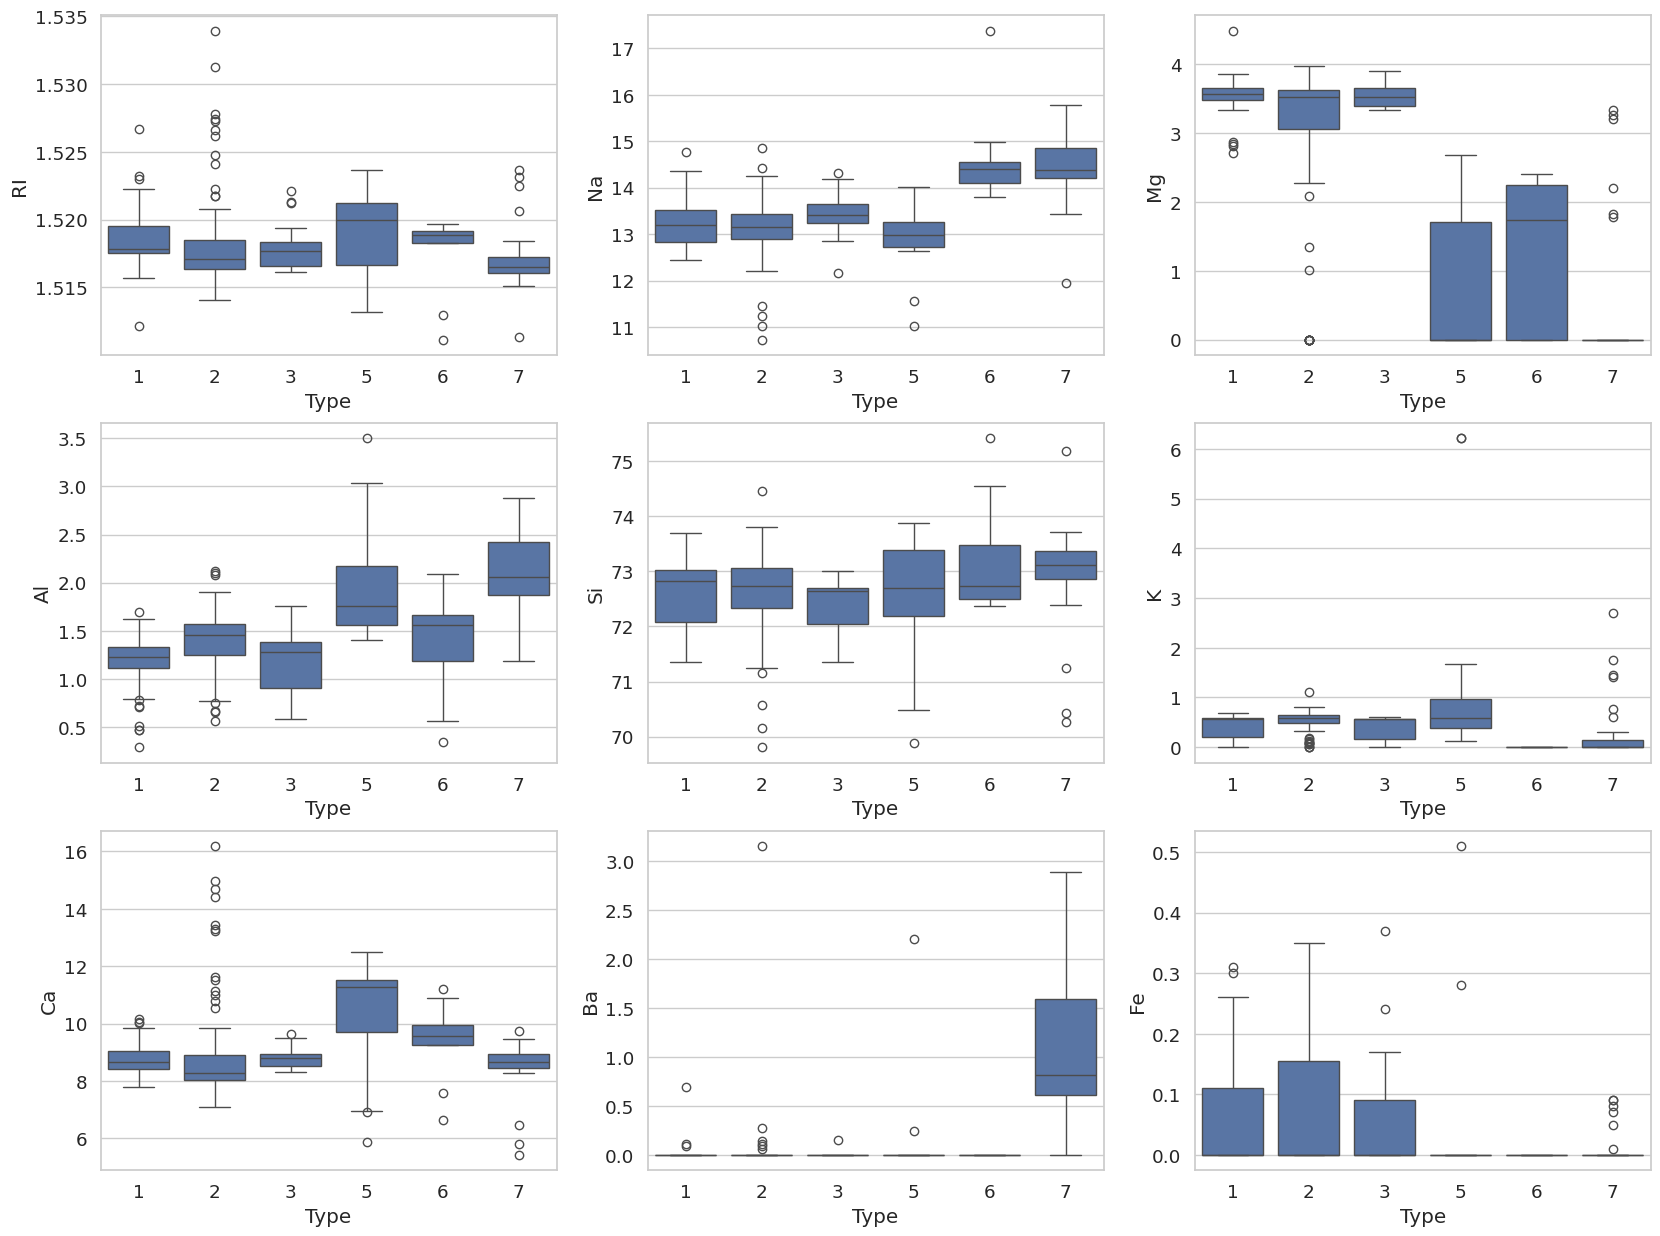

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=data)
plt.show()

#### Create a pairplot to display pairwise relationship. See [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for further details. This has been done for you.

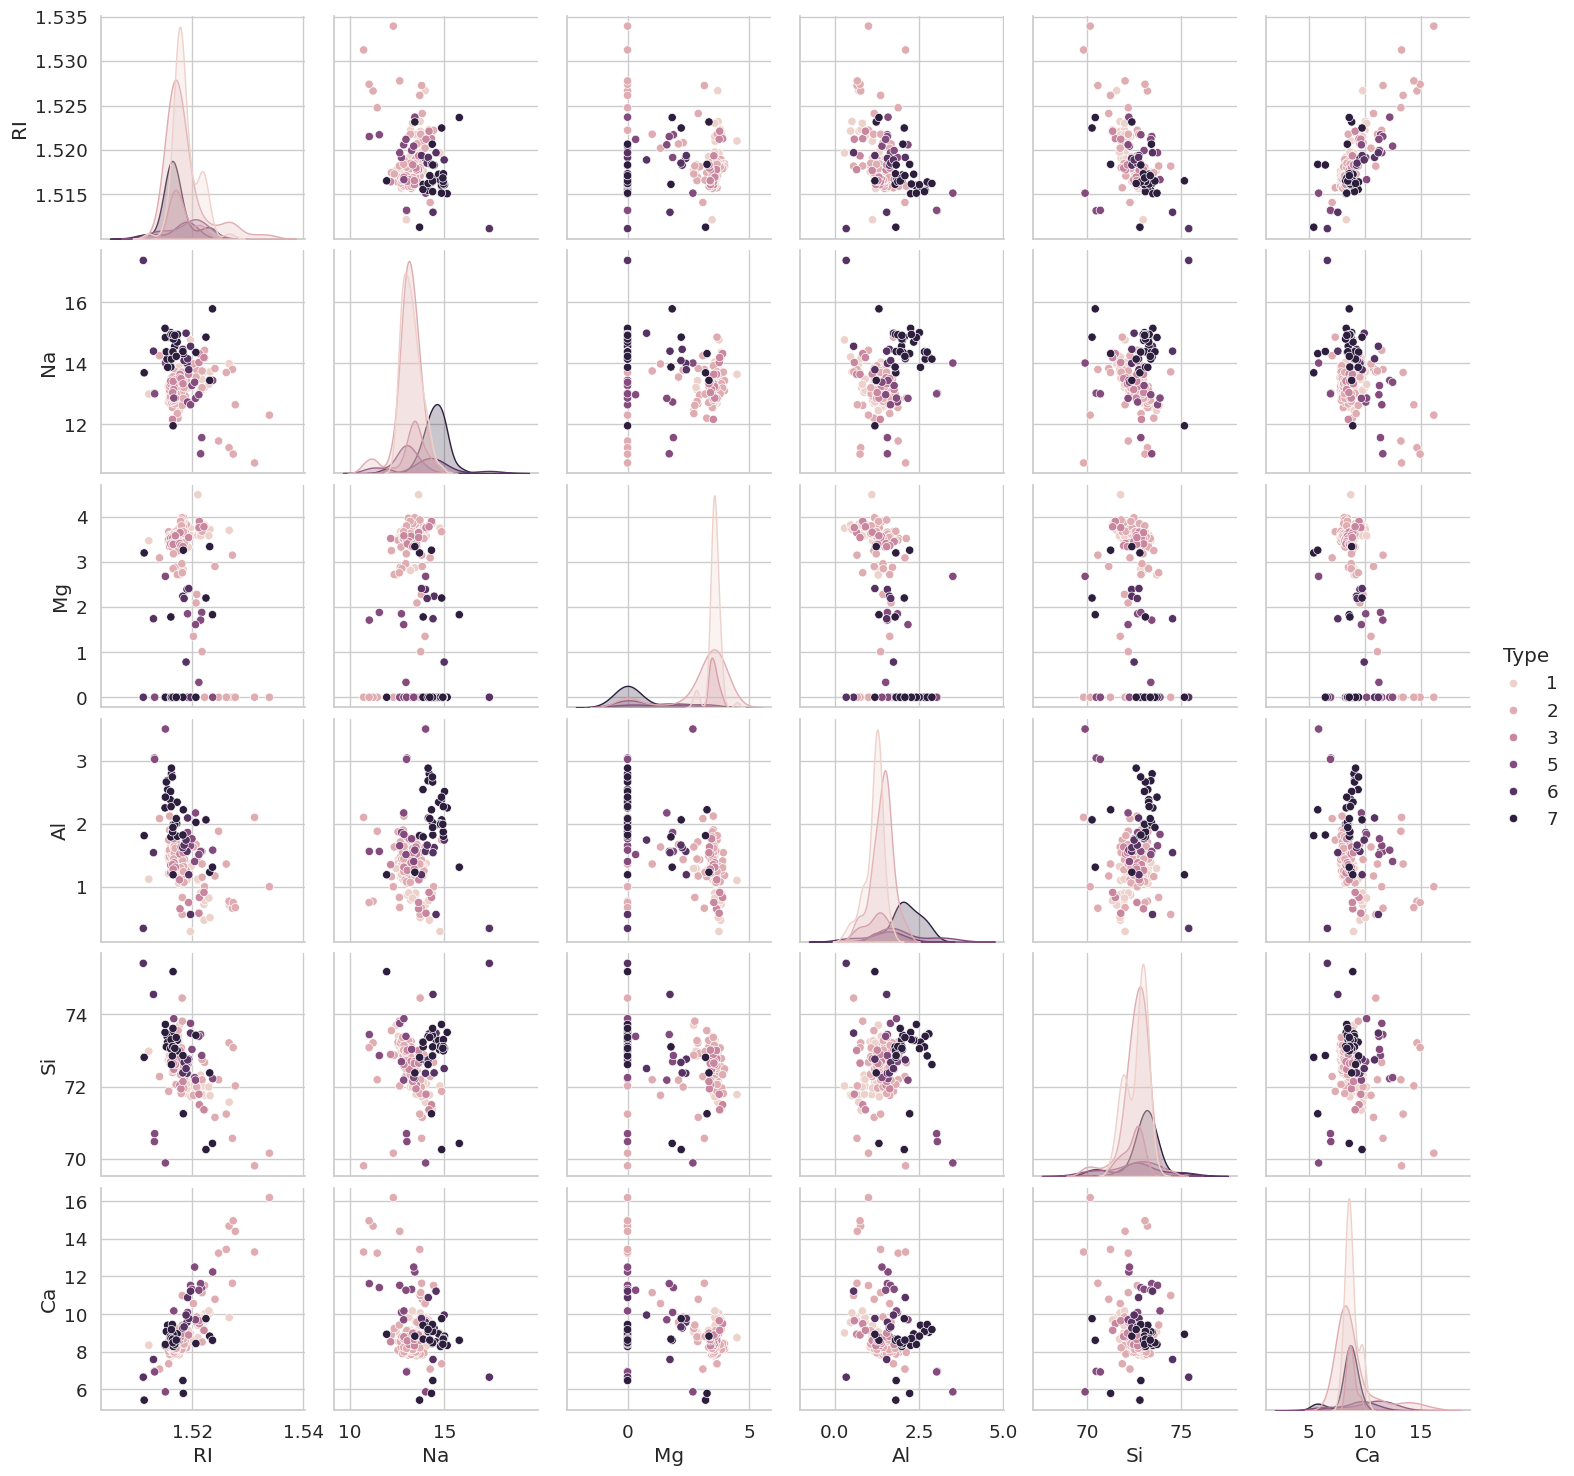

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(data[['RI','Na','Mg','Al','Si','Ca','Type']], hue='Type')

<Axes: >

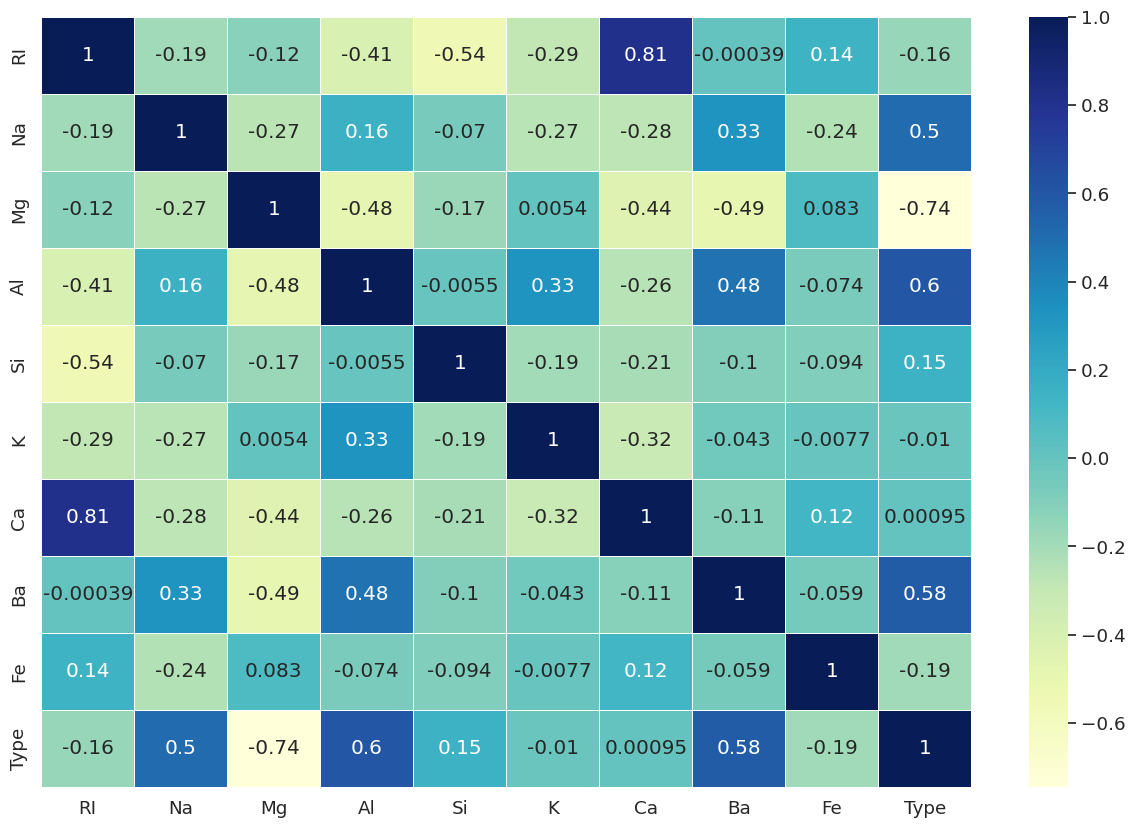

In [ ]:
# Plot heatmap showing correlation between different features
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

### Extract target and descriptive features (1 point)

#### Add the following features to the dataset to model interactions between the pairs of glass materials. (See [here](https://cmdlinetips.com/2019/01/3-ways-to-add-new-columns-to-pandas-dataframe/) for an example.)

    - Ca*Na
    - Al*Mg
    - Ca*Mg
    - Ca*RI

In [ ]:
# Additional features to be added to the data
data['Ca_Na'] = data.Ca*data.Na
data['Al_Mg'] = data.Al*data.Mg
data['Ca_Mg'] = data.Ca*data.Mg
data['Ca_RI'] = data.Ca*data.RI

In [ ]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'Ca_Na', 'Al_Mg', 'Ca_Mg', 'Ca_RI'], dtype=object)

#### Separate the target and features from the data.

In [ ]:
# Store all the features from the data in X
X= data.drop('Type',axis=1)
print(X)
# Store all the labels in y
y= data['Type']
print(y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe     Ca_Na  \
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0  119.3500   
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0  108.7587   
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0  105.2634   
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0  108.5862   
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0  107.0889   
..       ...    ...   ...   ...    ...   ...   ...   ...  ...       ...   
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0  129.8052   
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0  125.3280   
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0  121.1984   
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0  121.9424   
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0  122.6626   

      Al_Mg    Ca_Mg      Ca_RI  
0    4.9390  39.2875  13.308837  
1    4.8960  28.1880  11.882886

In [ ]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()
print(X.shape)
print(y.shape)

(214, 13)
(214,)


### Create training and validation datasets (1 point)


We will split the dataset into training and validation set. Generally in machine learning, we split the data into training,
validation and test set (this will be covered in later chapters). The model with best performance on the validation set is used to evaluate perfromance on
the test set which is the unseen data. In this assignment, we will using `train set` for training and evaluate the performance on the `validation set` for various
model configurations to determine the best hyperparameters (parameter setting yielding the best performance).

Split the data into training and validation set using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for validation. This has been done for you.

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

## Training Decision Tree-based Classifiers (18 points)


### Exercise 1: Learning a Decision Tree (10 points)

#### We will use the `sklearn` library to train a Decision Tree classifier. Review ch.4 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# tree visualization helper function
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

"""
clf: DecisionTreeClassifier

Returns a bytes object representing the image of the tree
"""
def get_tree_image(clf):
    dot_data = StringIO()
    feature_names=data.drop('Type',axis=1).columns
    class_names=["building_windows_float_processed", "building_windows_non_float_processed", "vehicle_windows_float_processed",
            "containers", "tableware", "headlamps"]
    export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    return graph.create_png()

#### Exercise 1a: Fit and interpret a decision tree. (6 points)

#### Fit Decision trees using the Gini index and entropy-based impurity measure.

#### Set the random_state to the value defined above. Keep all other parameters at their default values.

#### Report the training and validation set accuracies for each classifier.

In [ ]:

entropy_clf=DecisionTreeClassifier(criterion='entropy',random_state=random_state)
entropy_clf.fit(X_train,y_train)
print('entropy-based criterion')
print("train accuracy: %.2f" %entropy_clf.score(X_train,y_train))
prediction=entropy_clf.predict(X_train)
print("validation accuracy: %.4f"%entropy_clf.score(X_val,y_val))

gini_clf=DecisionTreeClassifier(criterion='gini',random_state=random_state)
gini_clf.fit(X_train,y_train)
print('gini index')
print("train accuracy: %.2f" %gini_clf.score(X_train,y_train))
print("validation accuracy: %.4f"%gini_clf.score(X_val,y_val))


entropy-based criterion
train accuracy: 1.00
validation accuracy: 0.7209
gini index
train accuracy: 1.00
validation accuracy: 0.7209


#### Visualize the Decision Tree with the best validation performance.

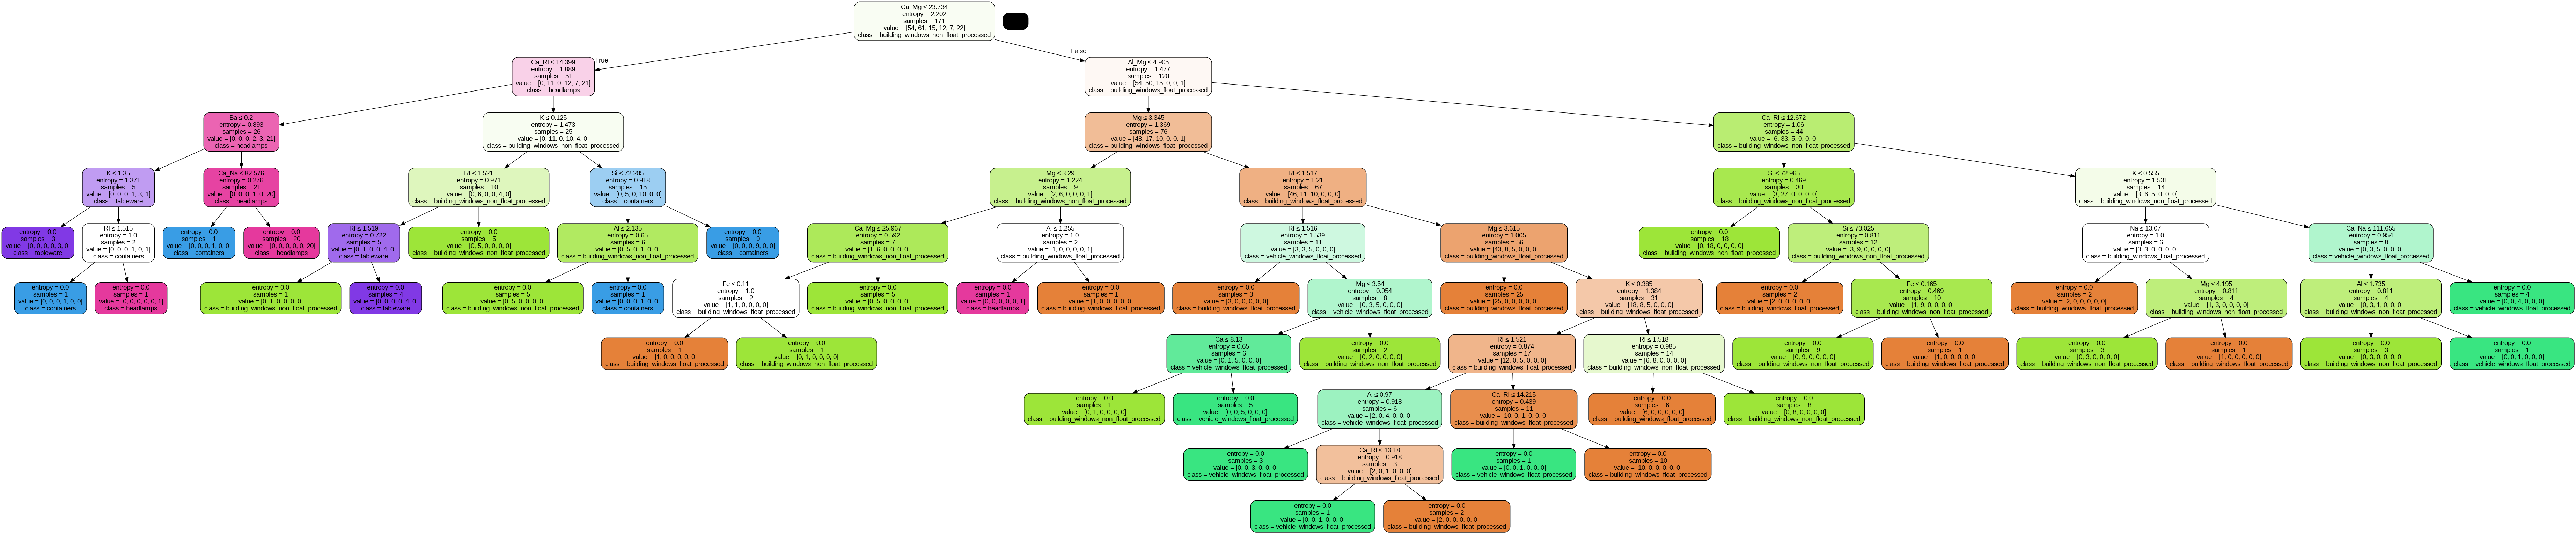

In [ ]:
best_clf=entropy_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

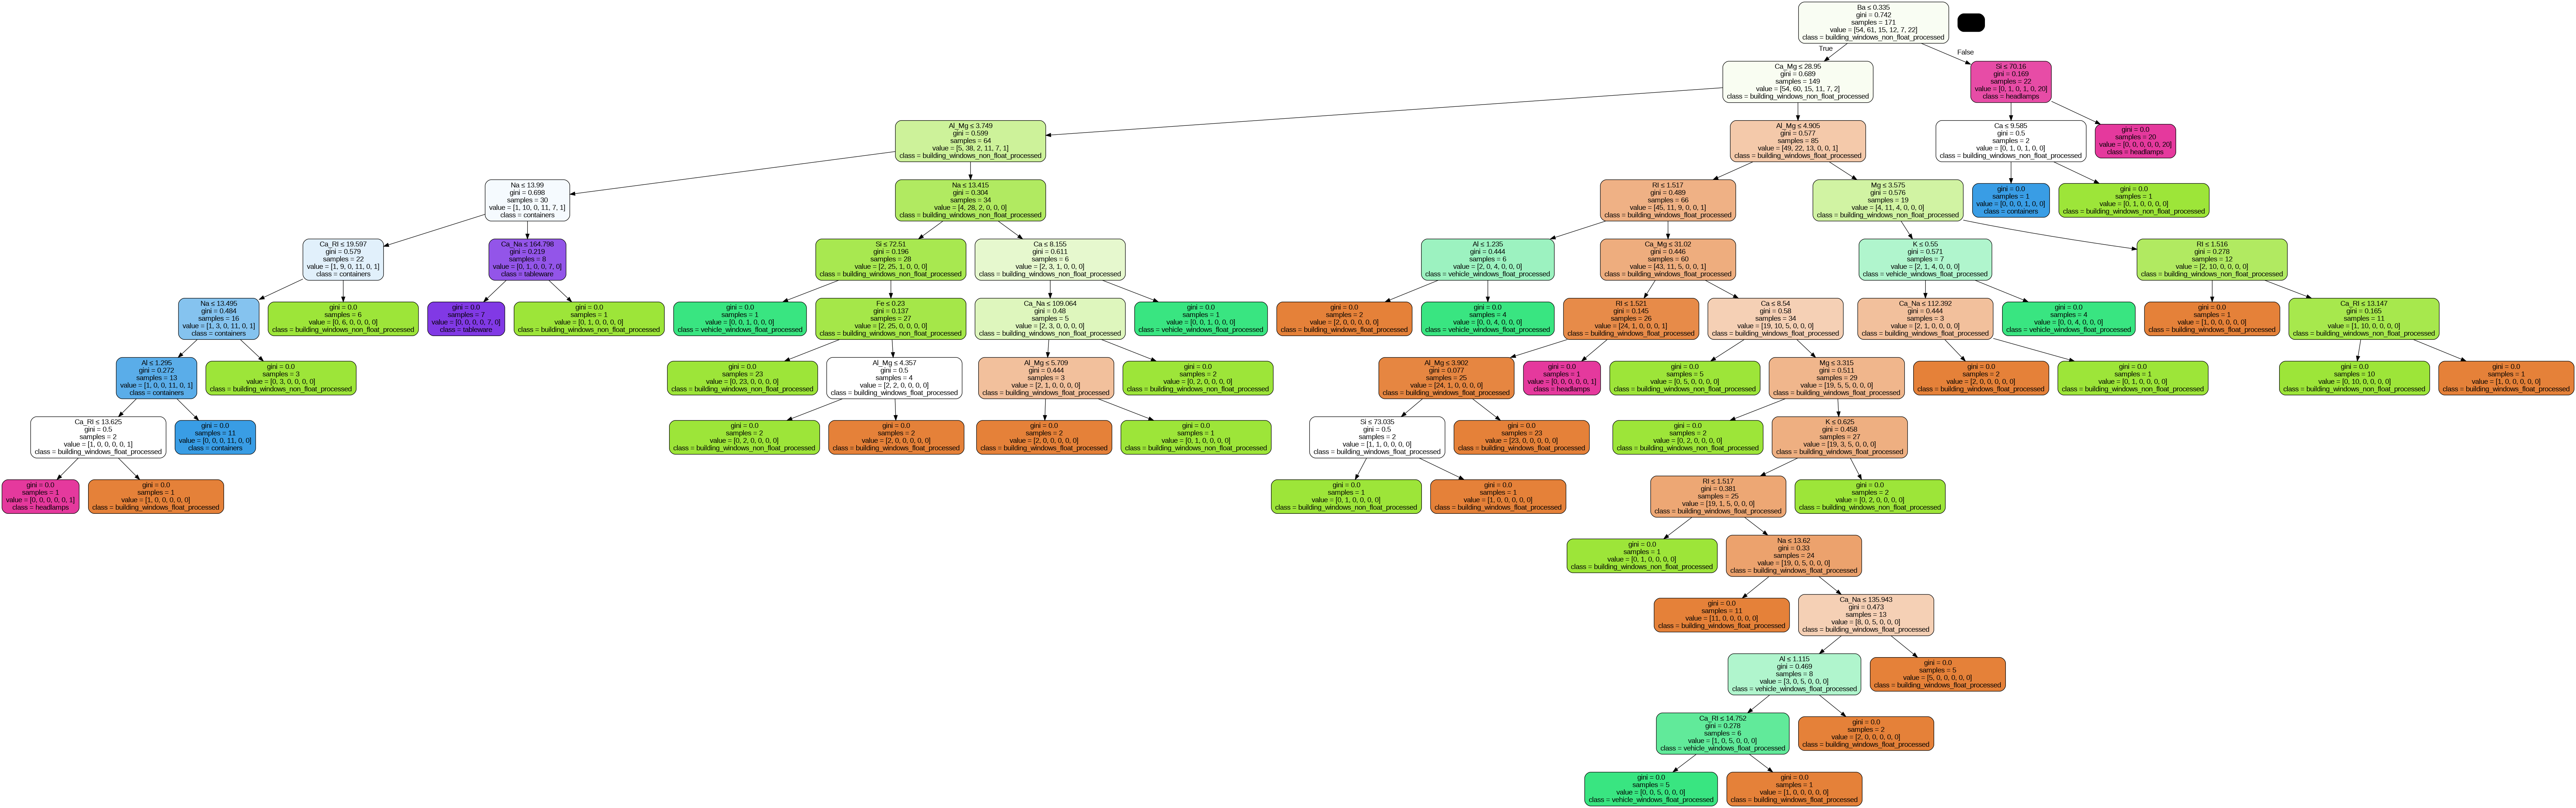

In [ ]:
best_clf=gini_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

#### Indicate the most informative descriptive feature (with the threshold) and briefly explain why this is the most informative (from an algorithmic viewpoint).

**Entropy:** The feature Ca_Mg (interaction between Calcium and Magnesium), with a threshold of $\leq 23.734$, is the most informative feature because it has the highest information gain.

**Gini:** The feature Ba (Barium) with a threshold of $\leq 0.335$, is the most informative feature because it has the highest information gain.

#### Briefly comment on the tree's depth and what factors may contribute to the shallowness/complexity of the tree.


**Entropy:** The tree depth is 9 (the max. distance between the root and a leaf node). The tree is deep because the algorithm grows the tree till it is consistent with the training dataset (100% training accuracy). This encourages the tree to overfit to irrelevant patterns and noise in the training data, resulting in nodes with partitions contains few instances.

**Gini:** The tree depth is 13 (the max. distance between the root and a leaf node). The tree is deep because the algorithm grows the tree till it is consistent with the training dataset (100% training accuracy). This encourages the tree to overfit to irrelevant patterns and noise in the training data, resulting in nodes with partitions contains few instances.

#### Show how one can interpret the tree by specifying the rule from its left most branch.

**Entropy:** If the interaction between Calcium and Magnesium (Ca_Mg) is $\leq 23.734$, the interaction between Calcium and refractive index (Ca_RI) is $\leq 14.399$, Barium (Ba) is $\leq 0.2$, Potassium (K) is $\leq 1.35$, then the type of glass is tableware.

**Gini:** Ba$\leq 0.335$, Ca_Mg$\leq 28.95$, Al_Mg$\leq 3.749$, Na$\leq 13.99$, Ca_RI$\leq 19.597$, Na$\leq 13.495$, Al$\leq 1.295$, Ca_RI$\leq 13.625$; if all the above restrictions are sequentially satisfied then the class is headlamps.

#### Exercise 1b: Preprune a decision tree. (2 points)

#### Next, let's try pruning the tree to see if we can improve the classifier's generalization performance.

####  Preprune a decision tree by varying the `max_depth` among {None (no depth control), 1,3,5,7}.

#### Set the criterion to entropy and the random_state to the value defined above. Keep all other parameters at their default values.

#### Report the training and validation set accuracies for each classifier.

In [ ]:

for max_depth in [1,3,5,7,None]:
    clf=DecisionTreeClassifier(criterion='entropy',random_state=random_state,max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    val_score=clf.score(X_val,y_val)
    print("max depth: %d" %(max_depth if max_depth else clf.get_depth()))
    print("training accuracy: %.2f" %train_score)
    print("validation accuracy: %.2f" %val_score)


max depth: 1
training accuracy: 0.44
validation accuracy: 0.53
max depth: 3
training accuracy: 0.73
validation accuracy: 0.65
max depth: 5
training accuracy: 0.88
validation accuracy: 0.74
max depth: 7
training accuracy: 0.98
validation accuracy: 0.74
max depth: 9
training accuracy: 1.00
validation accuracy: 0.72


#### Analyze the effect of increasing tree depth on training and validation performance.

Not limiting the tree depth results in perfect performance on the training dataset since the tree is grown until all leaf nodes are pure. Reducing tree depth degrades training performance because more leaf nodes are impure.

Increasing tree depth from 1 to 5 (or 7) improves validation performance because the model is better fitting the training dataset. Increasing the depth from further degrades validation performance due to increased overfitting.

#### Exercise 1c: Postprune a decision tree. (2 points)

#### Implement reduced error pruning on the two decision trees that you previously trained in Exercise 1a. Use the validation set to decide which nodes to prune.

#### Report the validation set accuracies for each classifier after pruning.

#### The pruning function is partly writen, please fill in the TODO part. Review ch.4.4.4 for more details.


In [ ]:
# Fit new trees if you want to keep the trees in 1a unmodified

entropy_clf=DecisionTreeClassifier(criterion='entropy',random_state=random_state)
entropy_clf.fit(X_train,y_train)
print('entropy-based criterion')
print("train accuracy: %.2f" %entropy_clf.score(X_train,y_train))
print("validation accuracy: %.4f"%entropy_clf.score(X_val,y_val))
print()

gini_clf=DecisionTreeClassifier(criterion='gini',random_state=random_state)
gini_clf.fit(X_train,y_train)
print('gini index')
print("train accuracy: %.2f" %gini_clf.score(X_train,y_train))
print("validation accuracy: %.4f"%gini_clf.score(X_val,y_val))
print()

def reduced_error_pruning(dtree, X_val, y_val):
    """
    Perform reduced error pruning on a decision tree classifier.

    This function directly modifies the decision tree passed as an argument.

    Args:
    dtree: DecisionTreeClassifier
        The decision tree to prune, must be already fitted.
    X_val: array-like
        Validation features used to prune the tree.
    y_val: array-like
        Validation labels used to determine pruning effectiveness.

    Returns:
    dtree: DecisionTreeClassifier
        The pruned decision tree.
    """

    # Access the internal tree structure to identify non-leaf nodes
    non_leaf_nodes = [i for i in range(dtree.tree_.node_count) if dtree.tree_.children_left[i] != dtree.tree_.children_right[i]]

    # Track the best accuracy and corresponding tree configuration. initialize with original accuracy.
    best_acc = dtree.score(X_val, y_val)

    # Iterate over non-leaf nodes in reverse order to consider pruning from the bottom up
    for i in reversed(non_leaf_nodes):
        # Store current node children to restore if needed
        left, right = dtree.tree_.children_left[i], dtree.tree_.children_right[i]

        # Temporarily make the node a leaf
        dtree.tree_.children_left[i], dtree.tree_.children_right[i] = -1, -1

        # Calculate the accuracy of the tree with the node pruned (turned into a leaf)
        temp_acc = dtree.score(X_val, y_val)

        if temp_acc < best_acc: # Revert pruning if accuracy decreases
            # Restore the node to its original state
            dtree.tree_.children_left[i], dtree.tree_.children_right[i] = left, right
        else:
            # Update the best accuracy observed
            best_acc = temp_acc

    return dtree  # Return the modified tree


pruned_entropy = reduced_error_pruning(entropy_clf, X_val, y_val)
pruned_entropy_acc = pruned_entropy.score(X_val,y_val)
print(f"Validation accuracy of entropy tree after pruning: {pruned_entropy_acc:.4f}")

pruned_gini = reduced_error_pruning(gini_clf, X_val, y_val)
pruned_gini_acc = pruned_gini.score(X_val,y_val)
print(f"Validation accuracy of gini tree after pruning: {pruned_gini_acc:.4f}")

entropy-based criterion
train accuracy: 1.00
validation accuracy: 0.7209

gini index
train accuracy: 1.00
validation accuracy: 0.7209

Validation accuracy of entropy tree after pruning: 0.8372
Validation accuracy of gini tree after pruning: 0.7907


### Exercise 2: Learning an Ensemble of Decision Trees (8 points)

#### We will use the `sklearn` library to implement bagging and boosting. Review ch.4 and read more on [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Exercise 2a: Fit a Random Forest. (4 points)

#### Fit different Random Forest classifiers by varying the number of trees among {10, 50, 100, 400, 1000}.

#### Set the `criterion` to entropy and set the random_state to the value defined above. Keep all other parameters at their default values.

#### Report the validation set accuracies for each classifier.

In [ ]:
random_state = 5

for n_estimator in [10,50,100,400,1000]:
    clf=RandomForestClassifier(n_estimators=n_estimator,criterion="entropy",random_state=random_state)
    clf.fit(X_train,y_train)
    print("# trees: %d" %n_estimator)
    print("validation accuracy: %.2f" %clf.score(X_val,y_val))

# trees: 10
validation accuracy: 0.74
# trees: 50
validation accuracy: 0.79
# trees: 100
validation accuracy: 0.84
# trees: 400
validation accuracy: 0.84
# trees: 1000
validation accuracy: 0.84


#### Comment on the effect of increasing the number of trees on validation performance. Compare the performance of the best performing Random Forest classifier against the Decision Tree Classifier trained with entropy (Ex. 1a) and explain any difference.

Increasing the number of trees from 10 to 100 improves performance, possibly because of increased variance among the decision trees resulting from bagging and subspace sampling. Adding more trees does not seem to help.

The best performing Random Forest classifier performs better than the the Decision Tree Classifier. This is because Random Forests combine bagging and subspace sampling to introduce diversity among the decision trees, whose predictions are then aggregated through majority voting to mitigate overfitting.

#### Exercise 2b: Fit a Gradient Boosted Decision Tree (GBDT). (4 points)

#### Fit different GBDTs by varying the number of boosting steps/trees added among {5, 10, 20, 50, 100, 200}.

#### Set the `n_iter_no_change` to 100, `validation_fraction=0.2`, and random_state to the value defined above. Keep all other parameters at their default values.

#### Report the training and validation set accuracies for each classifier.

In [ ]:
print(X_train.shape)
print(y_train.shape)
for n_estimator in [5, 10, 20, 50, 100, 200]:
    clf=GradientBoostingClassifier(n_estimators=n_estimator,random_state=random_state,n_iter_no_change=100, validation_fraction=0.2)
    clf.fit(X_train,y_train)
    print("# trees: %d" %n_estimator)
    print("training accuracy: %.2f" %clf.score(X_train,y_train))
    print("validation accuracy: %.2f" %clf.score(X_val,y_val))

(171, 13)
(171,)
# trees: 5
training accuracy: 0.84
validation accuracy: 0.77
# trees: 10
training accuracy: 0.89
validation accuracy: 0.84
# trees: 20
training accuracy: 0.94
validation accuracy: 0.79
# trees: 50
training accuracy: 0.93
validation accuracy: 0.77
# trees: 100
training accuracy: 0.93
validation accuracy: 0.74
# trees: 200
training accuracy: 0.93
validation accuracy: 0.74


#### Comment on the effect of increasing the number of trees on validation performance. Compare the performance of the best performing GBDT against that of the best performing Random Forest classifier (Ex. 2a) and Decision Tree classifier trained with entropy (Ex. 1a).

Increasing the number of trees from 5 to 10 improves validation performance because
the added decision trees help the ensemble better fit the training data by correcting errors made by ensemble models from previous boosting stages. Adding more decision trees to the ensemble degrades validation performance due to increased overfitting (this is evident upon looking at more sigfigs for the training accuracy).   

The best performing GBDT performs **the same as** the best performing Random Forest classifier and performs better than the Decision Tree classifier, but more controlled experiments (e.g., controlling for hyperparameters like max_depth) are needed to validate this.